# Bedingungen

Im Programmablauf müssen oft abhängig von bestimmten Zuständen (also z.B. dem aktuellen Wert einer Variablen oder einer Benutzereingabe) Abzweigungen genommenen werden. Dies wird über *Bedingungen* realisiert.

Das Programm prüft vor eine solchen "Abzweigung" ob eine Bedingung wahr oder falsch ist, und nimmt dann entweder den einen Weg oder den anderen.

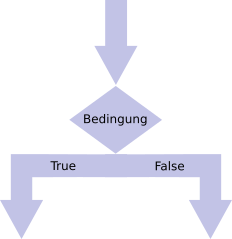

Stellen wir uns vor, wir programmieren einen Bankomaten:

~~~
# Dieses Beispiel verwendet Pseudocode

abzuhebender_betrag = input('Wieviel wollen Sie abheben? ')

WENN kontostand - abzuhebender_betrag >= ueberziehungsrahmen:
    Geld auszahlen   
SONST
    Fehlermeldung: Ihr Kontostand reicht nicht aus
~~~

Die allgemeine Form einer Bedingung in Python (und den meisten höheren Programmiersprachen) sieht so aus:

~~~
if BEDINGUNG == True:
    tue das eine
else:  # BEDINGUNG war nicht True
    tue etwas anderes
~~~

Wobei `else` weggelassen werden kann, wenn es nicht gebraucht wird.

## Beispieldaten einlesen
Im letzten Notebook haben wir die Zeilen aus der Datei `names_short.txt` in eine Liste von Zeilen namens `clean_names` eingelesen und dabei in einer List Comprehension die Linefeeds abgestreift.
Wir tun das hier noch einmal, weil wir mit diesen Daten arbeiten werden.

In [ ]:
with open('../data/vornamen/names_short.txt', encoding='utf-8') as fh:
    clean_names = [line.rstrip() for line in fh.readlines()]
print(clean_names)

## if
Ermitteln wir nun als Beispiel alle Namen aus unserer Liste `clean_names`, die länger als 8 Zeichen sind:

In [ ]:
for name in clean_names:
    if len(name) > 8:
        print(name)

## Bedingungen in List Comprehensions
Das letzte Beispiel lässt sich auch mit einer List Comprehension lösen:

In [ ]:
[name for name in clean_names if len(name) > 8]

## if ... else
Mit `else` können wir alle Fälle behandeln, die nicht die bei if gestellte Bedingung erfüllen. Im folgenden `else`-Abschnitt wollen wir zählen, wie viele Namen kürzer oder gleich 8 Zeichen sind:

In [ ]:
num_of_short_names = 0
num_of_long_names = 0

for name in clean_names:
    if len(name) > 8:
        num_of_long_names += 1
    else:
        num_of_short_names += 1
print(f"{num_of_short_names} kurze Namen und {num_of_long_names} lange Namen")

## Unterbedingungen
If-Bedingungen können verschachtelt werden:

In [ ]:
short_length_names = 0
medium_length_names = 0
long_length_names = 0

for name in clean_names:
    if len(name) > 8:
        long_length_names += 1
    else: # name was shorter than 9
        if len(name) < 5:
            short_length_names += 1
        else: # this is >= 5 (because of second if) and  <= 8 (because of first if)
            medium_length_names += 1
print(f'{short_length_names} kurze Namen, {medium_length_names} mittellange und {long_length_names} lange Namen')

## if ... elif ... else
In Python können solche verschachtelten Bedingungen oft vermieden werden, indem man `elif` verwendet. Python geht so lange durch die Abfolge an Bedingungen, bis die erste als `True` evaluiert wird. Alle darunter stehenden `elifs` und das `else` werden dann ignoriert:

In [ ]:
short_length_names = 0
medium_length_names = 0
long_length_names = 0

for name in clean_names:
    if len(name) > 8:
        long_length_names += 1
    elif len(name) < 5:
        short_length_names += 1
    else:
        medium_length_names += 1
        
print(f'{short_length_names} kurze Namen, {medium_length_names} mittellange und {long_length_names} lange Namen')

<div class="alert alert-block alert-info">
<b>Übung Condition-1</b>
<p>
Gehen Sie im Kopf Schritt für Schritt durch, was im oben stehenden Code passiert. Verwenden Sie dazu diese Namen:
<pre>
    ['Christopher', 'Anna', 'Elena']
</pre>
</p>
<p>
Sie sollten das so vorbereitet haben, dass Sie es in der Gruppe erklären können.    
</p>

Bei der Verwendung von elif ist zu beachten, dass Python, sobald es auf die erste `wahr` erkannte Bedingung stößt, keine weitere Bedingungen mehr prüft. Man muss hier also auf die korrekte Reihenfolge der `if` und `elif` statements achten:

In [ ]:
number = 40
if number < 100:
    print('number ist kleiner als 100')
elif number < 50:
    print('number ist kleiner als 50')    

Obwohl die Bedingung beim `elif` `True` liefert, wird der entsprechende Text nicht ausgegeben, weil zuvor bereits eine andere Bedingung wahr war. Das zu übersehen, ist ein beliebter Anfängerfehler.

<div class="alert alert-block alert-info">
<b>Übung Condition-2</b>
<p>Legen Sie eine int-Variable <tt>price</tt> an. Schreiben Sie dann eine <tt>if .. elif .. elif .. else</tt> Kaskade, diese für den Wert von <tt>price</tt> diese Ausagebe produziert:</p>
<ul>
<li>Wenn <tt>price > 10</tt> ist, geben Sie 'akzeptabel' aus.</li>
<li>Wenn <tt>price > 20</tt> ist, geben Sie 'teuer' aus.</li>
<li>Wenn <tt>price > 30</tt> ist, geben Sie 'sehr teuer' aus.</li>
<li>In allen anderen Fällen, geben Sie 'billig' aus.</li>
</ul>
<p>
Probieren Sie ihr Bedingungen mit verschiedenen Werten für `price` aus!
</p>    
</div>

## Doppelt vorkommende Namen entfernen
### Der in-Operator

In der Liste `clean_names` kommen manche Namen mehrfach vor. Je nach Fragestellung kann das erwünscht sein oder auch nicht. Versuchen wir einmal, doppelt vorkommende Namen zu verhindern. Dazu müssen wir einen neuen Operator einführen,
der testet, ob ein Wert in einer Sequenz vorhanden ist: `in`.

In [ ]:
'a' in 'Anakonda'

`in` funktioniert mit allen Sequenztypen und, wie wir noch sehen werden, auch mit ein paar anderen Typen. Da Listen zu den Sequenztypen gehören, funktioniert der 'in'-Operator auch mit Listen. Hier prüfen wir, ob der Integer `42` in einer Liste vorkommt:

In [ ]:
42 in [1, 55, 44, 32, 71, 41]

Im nächsten Beispiel verwenden wir den `in` Operator, um zu prüfen, ob der Name bereits in einer Liste distinkter Namen erscheint:

In [ ]:
distinct_names = []
for name in clean_names:
    if name in distinct_names:
        pass  # tue nichts
    else:
        distinct_names.append(name)
print(f'clean_names: {len(clean_names)} Einträgen, distinct_names: {len(distinct_names)} Einträge')

Das `pass` in der vierten Zeile dieses Beispiels ist eine Besonderheit von Python. Nach einem Doppelpunkt (`if name in distinct names:`) muss mindestens eine Anweisung stehen. Im konkreten Fall unseres Beispiels ist nichts zu tun, wenn der Name bereits in `distinct_names` vorhanden ist. Wegen des Doppelpunktes in der Zeile davor muss hier aber etwas stehen. Genau aus diesem Grund gibt es in Python die `pass`-Anweisung. Sie ist das Equivalent zu einem Paar geschwungener Klammern ohne Inhalt in anderen Programmiersprachen:

~~~
if(Bedingung) {
}
~~~

### not in
Wenn wir statt "in" "not in" verwenden (also die Bedingung umkehren), können wir im Beispiel oben auf das `else` und das `pass` verzichten:

In [ ]:
distinct_names = []
for name in clean_names:
    if name not in distinct_names:
        distinct_names.append(name)
print(f'clean_names: {len(clean_names)} Einträgen, distinct_names: {len(distinct_names)} Einträge')

Dieses Beispiel soll auch demonstrieren, dass es Sinn macht, Code zu vereinfachen und damit besser lesbar zu machen. Vergleichen Sie noch einmal in Ruhe die beiden Lösungen! Sie werden mir zustimmen, dass die zweite viel schneller zu verstehen ist, als die erste.

<div class="alert alert-block alert-info">
<b>Übung Condition-3</b>
<p>Lesen Sie noch einmal (wie oben) die Namensliste aus der Datei 
<tt>data/vornamen/names_short.txt</tt> in eine Liste und testen Sie, ob der Name "Alfons" in der Liste erscheint.
</div>

## Bedingungen mit dem ternären Operator

Für einfache `if .. else`-Bedingungen kann alternativ der ternäre Operator verwendet werden.
Da bedingte Ausdrücke mit dem ternären Operator in Python fast natürlichsprachlich zu
lesen sind, spricht nichts gegen deren Einsatz:

In [ ]:
speed = 45
if speed <= 50:
    print ( 'Speed ok')
else :
    print ( 'Too fast')

kann ternär so formuliert werden:

In [ ]:
'Speed ok' if speed <= 50 else 'Too fast'

welche der beiden Möglichkeiten man bei einfachen Bedingungen verwendet, bleibt Geschmackssache.

## Besonderheiten von Python
In if -Anweisungen können nicht nur die beiden boolschen Werte `True` und `False` ausgewertet werden, sondern noch andere Werte. Man kommt auch ohne dieses Wissen sehr weit, es lohnt sich aber, diese Besonderheiten einmal gehört (bzw. gelesen) zu haben, da sie allgemein als *pythonic* gelten und häufig verwendet werden. Hier finden Sie eine (unvollständige) Übersicht über häufiger in Bedingungen verwendete Werte. Entsprechende Beispiele stehen weiter unten:

* Numerischer Wert 0
  * ints, floats, complex werden, wenn sie auf `0` stehen, von `if` als `False` interpretiert.
  * Alle anderen numerischen Werte werden von `if` als `True` interpretiert.
* Leere Strings:
  * Leere Strings werden als `False` interpretiert
  * Alle anderen, d.h. nicht leeren String-Werte werden als `True` interpretiert
* NoneType: None
  * None wird als `False` interpretiert
* Leere Listen, Tupel, Dictionaries und Sets: `[]` , `()` , `{}` , `set()`
  * Wenn diese Typen leer sind (d.h. keine Elemente enthalten), werden sie als
    `False` interpretiert
  * Nicht leere Objekte dieser Typen werden als `True` interpretiert.
  
Hier finden sie einige Beispiele zum Experimentieren. Setzten Sie versuchsweise den Wert von `input`' auf andere Werte:  

In [ ]:
input = ""
if input:
    print("Input wurde als wahr interpretiert")
else:    
    print("Input wurde als False interpretiert.")

In [ ]:
input = 0
if input:
    print("Input wurde als wahr interpretiert")
else:    
    print("Input wurde als False interpretiert.")

In [ ]:
input = None
if input:
    print("Input wurde als wahr interpretiert")
else:    
    print("Input wurde als False interpretiert.")

In [ ]:
students = []
if input:
    print("Input wurde als wahr interpretiert")
else:    
    print("Input wurde als False interpretiert.")

## Bedingungen verknüpfen mit logischen Operatoren

Python kennt die folgenden Operatoren um 2 oder mehr Bedingungen logisch miteinander zu verknüpfen:

### and

Beide Bedingungen müssen wahr sein

In [ ]:
True and True

<div class="alert alert-block alert-info">
<b>Übung Condition-4</b>
<p>Finden Sie einen <tt>and</tt>-Ausdruck, der <tt>False</tt> liefert!</p>
</div>

### or

Mindestens eine Bedingung muss wahr sein 

In [ ]:
True or True

In [ ]:
True or False

In [ ]:
False or True

<div class="alert alert-block alert-info">
<b>Übung Condition-5</b>
<p>Finden Sie einen <tt>or</tt>-Ausdruck, der <tt>False</tt> liefert!</p>
</div>

### not

Kehrt den Wahrheitswert um (aus `True` wird `False` und umgekehrt)

In [ ]:
not True

### Logische Ausdrücke klammern

Runde Klammern können bei logischen Ausdrücken so ähnlich verwendet werden wie
beim Rechnen mit arithmetischen Operatoren. Die Klammern beeinflussen die Abarbeitungsreihenfolge: Was geklammert ist, wird zuerst ausgewertet. Grundsätzlich empfehle ich, ab einer gewissen Komplexitätsstufe Klammern zu verwenden, auch wenn sie gar nicht notwendig wären, weil Klammern den Ausdruck in der Regel nachvollziehbarer machen.

Denken wir einmal diese Beispiel durch:

```
if punkte > 1000 or punkte > 100 and status = ' Superpower ':
```

```
if punkte > 1000 or (punkte > 100 and status = 'Superpower'):
```

```
if (punkte > 1000 or punkte > 100) and status = 'Superpower':
```

Vielleicht wird es klarer, wenn wir nur auf die Wahrheitswerte reduzieren:

In [ ]:
True or True and False

In [ ]:
(True or True) and False

In [ ]:
True or (True and False)

Die logischen Operatoren werden in Python in dieser Reihenfolge abgearbeitet:
`not` vor `and` vor `or`. Geklammerte Ausdrücke werden zuerst ausgewertet.

<div class="alert alert-block alert-info">
<b>Übung Condition-6</b>
<p>Versetzen Sie sich in den Python-Interpreter und werten Sie die drei oben 
    stehenden Bedingungen schrittweise aus. Mit anderen Worten: 
    Ermitteln Sie schrittweise den Wahrheitswert der beiden 
    ersten auszuwählende Werte und wenden Sie dann dieses Ergebnis auf 
    den dritten Wert an, um den Wahrheitswert des gesamten Ausdrucks zu bekommen. 
    Schreiben Sie das Ergebnis einfach in die unten stehende Zelle. Er sollten dem 
    Ergebnis der drei Beispiele oben entsprechen. Falls sich das Ergebnis unterscheidet, 
    denken Sie darüber nach, wo Sie den Fehler gemacht haben.
</p>
<p>
    Um das zu verdeutlichen, hier für das erste Beispiel:
    <pre>
    (True and False) or True
    </pre>
</p>
</div>

In [ ]:
(True and False) or True

<div class="alert alert-block alert-info">
<b>Übung Condition-7</b>
<p>Stellen Sie sich vor, dass Sie ein Spiel programmieren. Zu einem gegebenen Zeitpunkt hat der Spieler einen bestimmten Score und einen bestimmten Status, die jeweils in einer Variable gespeichert sind. An dieser Stelle im Spiel entscheidet sich, ob der Spieler verliert oder nicht. Und zwar noch diesen Regeln:</p>
<ul>
<li>Wenn der Spieler mehr als 1000 Punkte hat, geht das Spiel unabhängig vom Status des Spielers weiter</li>
<li>Wenn der Spieler mehr als 100 Punkte hat, und der Status auf "Superpower" steht, geht das Spiel auch weiter</li>
<li>In allen anderen Fällen heißt es 'game over'</li>
</ul>
<p>    
    Schreiben Sie <b>einen</b> if-Ausdruck mit mehreren logisch verknüpften Bedingungen, der diese Regeln berücksichtigt. Je nach score und status soll entweder 'Das Spiel geht weiter' oder 'Game over' ausgeben werden.
</p>
<p>
Wichtig: Probieren Sie Ihr if-Konstrukt aus, indem Sie die Werte der beiden Variablen zum Testen verändern.
</p>
</div>

In [ ]:
score = 500
status = 'Superpower'

if ...
   print("Das Spiel geht weiter")
else:
    print("Game over")

## match

Seit Python Version 3.10 gibt es in Python (so wie in vielen anderen Programmiersprachen auch) die Möglichkeit der Fallunterscheidung mit `case`. Diese wird eingeleitet mit einem `match <Ausdruck oder Wert>:` gefolgt von beliebig vielen `case` Statements. In anderen Programmiersprachen gibt es ein ähnliches Konstrukt als `switch/case`. `match/case` ist besonders sinnvoll, wenn es viele Fallunterscheidungen gibt. In der einfachsten Form sieht das so aus:

In [ ]:
month_int = int(input("Give your birth month as int (1=Jan etc.)"))
month_name = None
match month_int:
    case 1:
        month_name = "Jänner"
    case 2:
        month_name = "Februar"
    case 3:
        month_name = "März"
    case 4:
        month_name = "April"
    case 5:
        month_name = "Mai"
    case 6:
        month_name = "Juni"
    case 7:
        month_name = "Juli"
    case 8:
        month_name = "August"
    case 9:
        month_name = "September"
    case 10:
        month_name = "Oktober"
    case 11:
        month_name = "November"
    case 12:
        month_name = "Dezember"
    case _:
        month_name = "Not a month"
print(month_name)

Sobald ein `case` einen Treffer ergibt, wird nicht mehr weiter verglichen. Das in anderen Sprachen nötige `break` ist also nicht nötig.

Der zu vergleichende Wert muss keinen bestimmten Datentyp haben. Man kann also auch z.B. String oder Floats vergleichen. 

Mehrere Werte können durch den `|` Operator verbunden werden:

In [ ]:
month_int = int(input("Give your birth month as int (1=Jan etc.)"))
season = None
# this is valid for Graz
match month_int:
    case 1 | 2 | 12:
        month_name = "winter"
    case 3 | 4 | 5 :
        month_name = "spring"
    case 6 | 7 |8 | 9 :
        month_name = "summer"
    case 10 | 11:
        month_name = "autumn"
    case _:
        month_name = "Not a month"
print(month_name)

## Vertiefende Literatur
Ich empfehle ausdrücklich, mindestens eine der folgenden Ressourcen zur Vertiefung zu lesen!

  * Python Tutorial: 
	* Kapitel 4.1
		* https://docs.python.org/3/tutorial/controlflow.html#if-statements
  * Klein, Kurs: 
	* https://python-kurs.eu/bedingte_anweisungen.php
  * Sweigart: https://automatetheboringstuff.com/2e/chapter2/
  
  
  * Klein, Buch: Kapitel 8. 
  * Kofler: Kapitel 8.1.
  * Inden: Kapitel 2.4 und 6.6.
  * Weigend: Kapitel 5.1, 5.2 und 5.3.  
  
Für alle, die es ganz genau wissen wollen:   Unter https://docs.python.org/3/reference/expressions.html#operator-precedence ist die Rangordnung (precedence) aller Operatoren dokumentiert.

## Lizenz

This notebook ist part of the course [Grundlagen der Programmierung](https://github.com/gvasold/gdp) held by [Gunter Vasold](https://online.uni-graz.at/kfu_online/wbForschungsportal.cbShowPortal?pPersonNr=51488) at Graz University 2017&thinsp;ff. 

<p>
    It is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0">CC BY-NC-SA 4.0</a>
</p>

<table>
    <tr>
    <td>
        <img style="height:22px" 
             src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"/></li>
    </td>
    <td>
    <img style="height:22px;"
         src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" /></li>
    </td>
    <td>
        <img style="height:22px;"
         src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1" /></li>
    </td>
    <td>
        <img style="height:22px;"
             src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" /></li>
    </td>
</tr>
</table>

---

<div style="text-align: center; margin-top:20pt;">  
  <a href="07-listen.ipynb">← Vorheriges Notebook</a>  
  <span style="width: 100px;display: inline-block;"> </span>
    <a href="00-inhalt.ipynb">↑ Inhaltsübersicht</a>
    <span style="width: 100px;display: inline-block;"> </span>
  <a href="../02-datenstrukturen/01-dictionaries.ipynb">Nächstes Notebook →</a>  
</div> 